##1.Downloading data from folder on Google Drive##

In [1]:
import pandas as pd
import numpy as np
from google.colab import drive

In [2]:
drive.mount('/gdrive')
%cd /gdrive
path = '/gdrive/My Drive/Colab Notebooks/Datafiles/Glass/glass.data'
names = ['RI', 'NA2O', 'MGO', 'AL2O3', 'SIO2', 'K2O', 'CAO', 'BAO',
         'FE2O3', 'TYPE']
data = pd.read_csv(path, names=names, header=None)
data

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
/gdrive


,RI,NA2O,MGO,AL2O3,SIO2,K2O,CAO,BAO,FE2O3,TYPE
1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


##2. Data Preprocessing##

**Checking Nans**

In [3]:
data.isna().sum()

RI       0
NA2O     0
MGO      0
AL2O3    0
SIO2     0
K2O      0
CAO      0
BAO      0
FE2O3    0
TYPE     0
dtype: int64

**Checking for string values**

In [4]:
for name in names:
  print(data[name].unique())

[1.52101 1.51761 1.51618 1.51766 1.51742 1.51596 1.51743 1.51756 1.51918
 1.51755 1.51571 1.51763 1.51589 1.51748 1.51784 1.52196 1.51911 1.51735
 1.5175  1.51966 1.51736 1.51751 1.5172  1.51764 1.51793 1.51721 1.51768
 1.51747 1.51775 1.51753 1.51783 1.51567 1.51909 1.51797 1.52213 1.51779
 1.5221  1.51786 1.519   1.51869 1.52667 1.52223 1.51898 1.5232  1.51926
 1.51808 1.51837 1.51778 1.51769 1.51215 1.51824 1.51754 1.51905 1.51977
 1.52172 1.52227 1.52099 1.52152 1.523   1.51574 1.51848 1.51593 1.51631
 1.5159  1.51645 1.51627 1.51613 1.51592 1.51646 1.51594 1.51409 1.51625
 1.51569 1.5164  1.51841 1.51605 1.51588 1.51629 1.5186  1.51689 1.51811
 1.51655 1.5173  1.5182  1.52725 1.5241  1.52475 1.53125 1.53393 1.52222
 1.51818 1.52664 1.52739 1.52777 1.51892 1.51847 1.51846 1.51829 1.51708
 1.51673 1.51652 1.51844 1.51663 1.51687 1.51707 1.52177 1.51872 1.51667
 1.52081 1.52068 1.5202  1.52614 1.51813 1.518   1.51789 1.51806 1.51711
 1.51674 1.5169  1.51851 1.51662 1.51709 1.5166  1.

As we can see all data is float, so no changes are required.

**Checking for correlation**

In [5]:
import seaborn as sn
import matplotlib.pyplot as plt

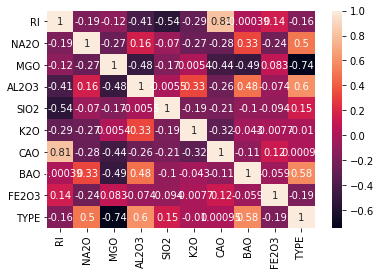

In [6]:
corrMatrix = data.corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()

There is correlation, but logicaly those element just come from different objects, so some correlation must be. Also, such correlation will be taken in account.

**Standardization and dividing into test and training**

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X = data.drop(['TYPE'],axis=1)
y = data['TYPE']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=20)

X_train

,RI,NA2O,MGO,AL2O3,SIO2,K2O,CAO,BAO,FE2O3
180,1.51852,14.09,2.19,1.66,72.67,0.00,9.32,0.00,0.00
65,1.52172,13.48,3.74,0.90,72.01,0.18,9.61,0.00,0.07
120,1.51652,13.56,3.57,1.47,72.45,0.64,7.96,0.00,0.00
154,1.51610,13.42,3.40,1.22,72.69,0.59,8.32,0.00,0.00
99,1.51689,12.67,2.88,1.71,73.21,0.73,8.54,0.00,0.00
...,...,...,...,...,...,...,...,...,...
149,1.51670,13.24,3.57,1.38,72.70,0.56,8.44,0.00,0.10
138,1.51711,12.89,3.62,1.57,72.96,0.61,8.11,0.00,0.00
157,1.51655,13.41,3.39,1.28,72.64,0.52,8.65,0.00,0.00
16,1.51761,12.81,3.54,1.23,73.24,0.58,8.39,0.00,0.00


In [9]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

##3. Model Selection and Training##

In [10]:
from sklearn.metrics import accuracy_score
models =[]

**Logistic Regression**

In [11]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print('LogisticRegression: ', accuracy_score(y_test,y_pred)*100)
models.append(['LogisticRegression: ',accuracy_score(y_test,y_pred)*100])

LogisticRegression:  55.81395348837209


**KNN**

In [12]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(3)
model.fit(X_train, y_train)
train_predictions = model.predict(X_test)
y_pred=model.predict(X_test)
print('KNN3: ', accuracy_score(y_test,y_pred)*100)
models.append(['KNN3 ',accuracy_score(y_test,y_pred)*100])

KNN3:  58.139534883720934


In [13]:
model = KNeighborsClassifier(4)
model.fit(X_train, y_train)
train_predictions = model.predict(X_test)
y_pred=model.predict(X_test)
print('KNN4: ', accuracy_score(y_test,y_pred)*100)
models.append(['KNN4 ',accuracy_score(y_test,y_pred)*100])

KNN4:  53.48837209302325


In [14]:
model = KNeighborsClassifier(5)
model.fit(X_train, y_train)
train_predictions = model.predict(X_test)
y_pred=model.predict(X_test)
print('KNN5: ', accuracy_score(y_test,y_pred)*100)
models.append(['KNN5 ',accuracy_score(y_test,y_pred)*100])

KNN5:  53.48837209302325


**XGBOOST**

In [15]:
from xgboost import XGBClassifier
model = XGBClassifier()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print('XGBClassifier: ', accuracy_score(y_test,y_pred)*100)
models.append(['XGBClassifier: ',accuracy_score(y_test,y_pred)*100])

XGBClassifier:  67.44186046511628


**Random Forest**

In [16]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=50, random_state=42)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print('RandomForestClassifier: ', accuracy_score(y_test,y_pred)*100)
models.append(['RandomForestClassifier: ',accuracy_score(y_test,y_pred)*100])

RandomForestClassifier:  60.46511627906976


**SVC**

In [17]:
from sklearn.svm import SVC
model = SVC()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print('SVC: ', accuracy_score(y_test,y_pred)*100)
models.append(['SVC: ',accuracy_score(y_test,y_pred)*100])

SVC:  55.81395348837209


**Neural Network**

In [21]:
import tensorflow as tf
import math
from keras.layers import Dense, Activation, Flatten, Dropout, BatchNormalization
from tensorflow.keras.utils import to_categorical
from keras.optimizers import SGD

In [19]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [22]:
model = tf.keras.Sequential([
              Dense(30, activation=tf.nn.leaky_relu, input_shape=[9]),
              BatchNormalization(),
              Dropout(0.4),
              Dense(15, activation=tf.nn.leaky_relu),
              Dropout(0.4),
              BatchNormalization(),
              Dense(8, activation=tf.nn.softmax)
])
opt = SGD(lr=0.001, momentum=0.9)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=100, 
                    validation_data=(X_test, y_test))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/100
6/6 [==============================] - 1s 38ms/step - loss: 2.8082 - accuracy: 0.1111 - val_loss: 2.2209 - val_accuracy: 0.0465
Epoch 2/100
6/6 [==============================] - 0s 6ms/step - loss: 2.7096 - accuracy: 0.0760 - val_loss: 2.1804 - val_accuracy: 0.0698
Epoch 3/100
6/6 [==============================] - 0s 5ms/step - loss: 2.5072 - accuracy: 0.0994 - val_loss: 2.1285 - val_accuracy: 0.0698
Epoch 4/100
6/6 [==============================] - 0s 5ms/step - loss: 2.4301 - accuracy: 0.1404 - val_loss: 2.0786 - val_accuracy: 0.1163
Epoch 5/100
6/6 [==============================] - 0s 7ms/step - loss: 2.4098 - accuracy: 0.1520 - val_loss: 2.0363 - val_accuracy: 0.2093
Epoch 6/100
6/6 [==============================] - 0s 6ms/step - loss: 2.2862 - accuracy: 0.1520 - val_loss: 1.9980 - val_accuracy: 0.2558
Epoch 7/100
6/6 [==============================] - 0s 6ms/step - loss: 2.2638 - accuracy: 0.2222 - val_loss: 1.9585 - val_accuracy: 0.2558
Epoch 8/100
6/6 [=========

In [23]:
models

[['LogisticRegression: ', 55.81395348837209],
 ['KNN3 ', 58.139534883720934],
 ['KNN4 ', 53.48837209302325],
 ['KNN5 ', 53.48837209302325],
 ['XGBClassifier: ', 67.44186046511628],
 ['RandomForestClassifier: ', 60.46511627906976],
 ['SVC: ', 55.81395348837209]]

As we can see, XGBoost has the best result.